In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import scienceplots
plt.style.use(['science', 'grid', 'notebook'])
%matplotlib widget

In [2]:
rng = np.random.default_rng(2)
X = rng.random(400).reshape(-1,2)
X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
Y = np.zeros(len(X))

i=0
for t,d in X:
    y = -3/(260-175)*t + 21
    if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
        Y[i] = 1
    else:
        Y[i] = 0
    i += 1

X, Y = X, Y.reshape(-1,1)
pos = (Y == 1).reshape(1, -1)[0]
neg = (Y == 0).reshape(1, -1)[0]

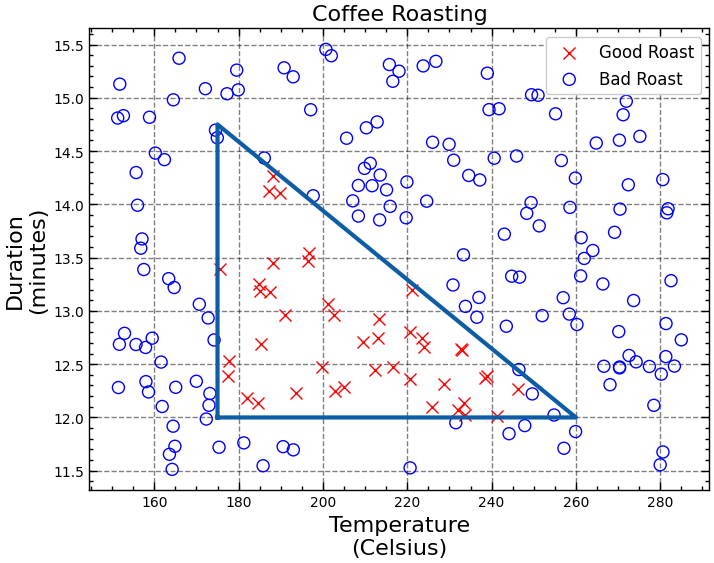

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.tick_params(axis="both", labelsize=10)
ax.set_title("Coffee Roasting")
ax.set_xlabel("Temperature\n(Celsius)")
ax.set_ylabel("Duration\n(minutes)")
ax.scatter(X[pos][:, 0], X[pos][:, 1], marker="x", s=75, lw=1, facecolors="red", label="Good Roast")
ax.scatter(X[neg][:, 0], X[neg][:, 1], marker="o", s=75, lw=1, facecolors="none", edgecolors="blue", label="Bad Roast")
ax.plot([175, 175, 260, 175], [12, 14.75, 12, 12], lw=3)
ax.legend(fontsize="large", loc="upper right")

## Neural Network

In [4]:
norm_l = tf.keras.layers.Normalization()
norm_l.adapt(X)
Xn = norm_l(X)

In [5]:
Xt = np.tile(Xn, (1000, 1))
Yt = np.tile(Y, (1000, 1))

In [6]:
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


In [7]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ], name="SPN"
)

In [8]:
model.summary()

Model: "SPN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.8252599  -0.9029499  -0.30023336]
 [ 0.02150714 -1.0395612  -0.9565095 ]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[0.6254113 ]
 [0.83227146]
 [0.17536235]] 
b2(1,): [0.]


In [10]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 412us/step - loss: 0.3796
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 424us/step - loss: 0.1349
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 416us/step - loss: 0.1233
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 413us/step - loss: 0.1153
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 416us/step - loss: 0.1098
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 419us/step - loss: 0.0688
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 413us/step - loss: 0.0163
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 413us/step - loss: 0.0107
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 416us/step - loss: 0.0075
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 419us/step - loss: 0.0054


In [11]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[  0.09568743 -18.165527    -9.833621  ]
 [ -8.57406    -15.227142    -0.128994  ]] 
b1(3,): [-10.757927   -2.5843408 -10.744856 ]
W2(3, 1):
 [[-35.302155]
 [ 28.489498]
 [-38.708096]] 
b2(1,): [-8.266526]


In [12]:
W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])
model.get_layer("layer1").set_weights([W1,b1])
model.get_layer("layer2").set_weights([W2,b2])

In [13]:
examples = np.array([
    [200, 13.9], # Positive Example
    [200, 17] # Negative Example
    ])
examples_normalized = norm_l(examples)

In [14]:
predictions = model.predict(examples_normalized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [15]:
yhat = (predictions >= 0.5).astype(int)
print(yhat)

[[1]
 [0]]


In [ ]:
temp = np.linspace(145, 290, 100)
duration = np.linspace(11.3, 15.6, 100)
temp, duration = np.meshgrid(temp, duration)
m = temp.shape[0]
n = temp[0].shape[0]

layer1_unit0_grid = np.zeros_like(temp)
layer1_unit1_grid = np.zeros_like(temp)
layer1_unit2_grid = np.zeros_like(temp)

# W1 = np.array([
#     [-8.94,  0.29, 12.89],
#     [-0.17, -7.34, 10.79]] )
# b1 = np.array([-9.87, -9.28,  1.01])

def sigmoid(z):
    return 1/(1+np.exp(-z))

for i in range(m):
    for j in range(n):
        current_data = np.array([[temp[i][j], duration[i][j]]])
        current_data_normalized = norm_l(current_data)
        layer1_unit0_grid[i][j] = sigmoid(np.dot(current_data_normalized, np.array([-8.94, -0.17])) + -9.87)

for i in range(m):
    for j in range(n):
        current_data = np.array([[temp[i][j], duration[i][j]]])
        current_data_normalized = norm_l(current_data)
        layer1_unit1_grid[i][j] = sigmoid(np.dot(current_data_normalized, np.array([0.29, -7.34])) + -9.28)

for i in range(m):
    for j in range(n):
        current_data = np.array([[temp[i][j], duration[i][j]]])
        current_data_normalized = norm_l(current_data)
        layer1_unit2_grid[i][j] = sigmoid(np.dot(current_data_normalized, np.array([12.89, 10.79]))+ 1.01)

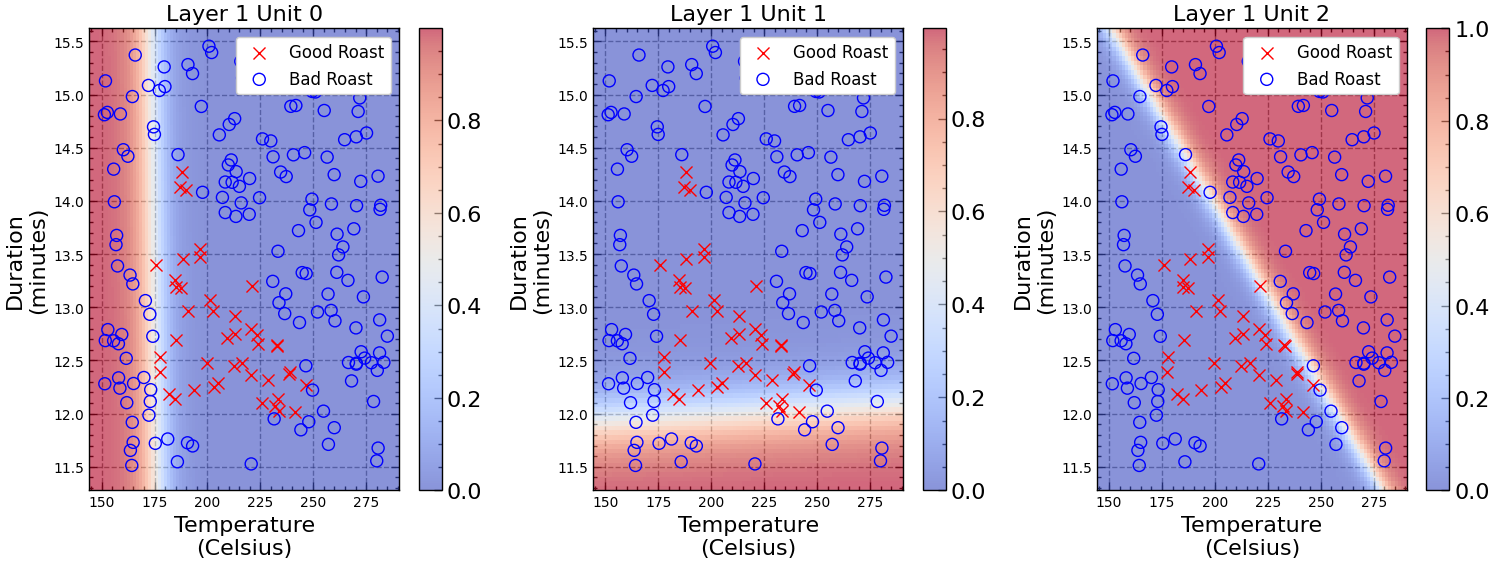

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.subplots_adjust(wspace=0.3)
ax = axes[0]
ax.set_title("Layer 1 Unit 0")
c = ax.pcolormesh(temp, duration, layer1_unit0_grid, cmap="coolwarm", alpha=0.6)
fig.colorbar(c)

ax = axes[1]
ax.set_title("Layer 1 Unit 1")
c = ax.pcolormesh(temp, duration, layer1_unit1_grid, cmap="coolwarm", alpha=0.6)
fig.colorbar(c)

ax = axes[2]
ax.set_title("Layer 1 Unit 2")
c = ax.pcolormesh(temp, duration, layer1_unit2_grid, cmap="coolwarm", alpha=0.6)
fig.colorbar(c)


for ax in axes:
    ax.tick_params(axis="both", labelsize=10)
    ax.set_xlabel("Temperature\n(Celsius)")
    ax.set_ylabel("Duration\n(minutes)")
    ax.scatter(X[pos][:, 0], X[pos][:, 1], marker="x", s=75, lw=1, facecolors="red", label="Good Roast")
    ax.scatter(X[neg][:, 0], X[neg][:, 1], marker="o", s=75, lw=1, facecolors="none", edgecolors="blue", label="Bad Roast")
    ax.legend(fontsize="large", loc="upper right")

In [18]:
unit_0 = np.linspace(0, 1, 10)
unit_1 = np.linspace(0, 1, 10)
unit_2 = np.linspace(0, 1, 10)
X_, Y_, Z_ = np.meshgrid(unit_0, unit_1, unit_2)
# W2 = np.array([
#     [-31.38],
#     [-27.86],
#     [-32.79]])
# b2 = np.array([15.54])
intensity_grid = np.zeros_like(X_)
for i in range(10):
    for j in range(10):
        for k in range(10):
            current_data = np.array([X_[i][j][k], Y_[i][j][k], Z_[i][j][k]])
            intensity_grid[i][j][k] = sigmoid(np.dot(current_data, np.array([-31.38, -27.86, -32.79])) + 15.54)

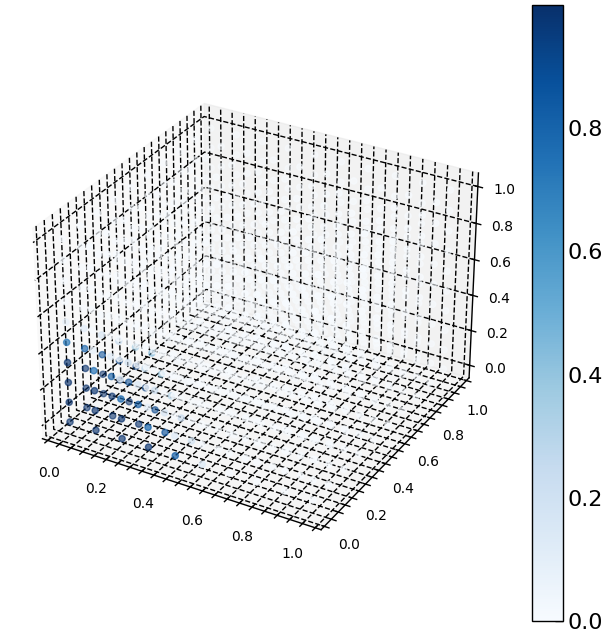

In [20]:
fig, axes = plt.subplots(1, 1, subplot_kw={"projection": "3d"}, figsize=(8, 8))
axes.tick_params(axis="both", labelsize=10)
a = axes.scatter(X_, Y_, Z_, marker="o", c=intensity_grid, cmap=plt.cm.Blues)
fig.colorbar(a)

In [ ]:
temp_range = np.linspace(150, 290, 50)
duration_range = np.linspace(11.2, 16, 50)
temp, duration = np.meshgrid(temp_range, duration_range)
y_grid = np.zeros_like(temp)
for i in range(50):
    for j in range(50):
        current_data = np.array([[temp[i][j], duration[i][j]]])
        current_data_normalized = norm_l(current_data)
        y_grid[i][j] = model.predict(current_data_normalized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━

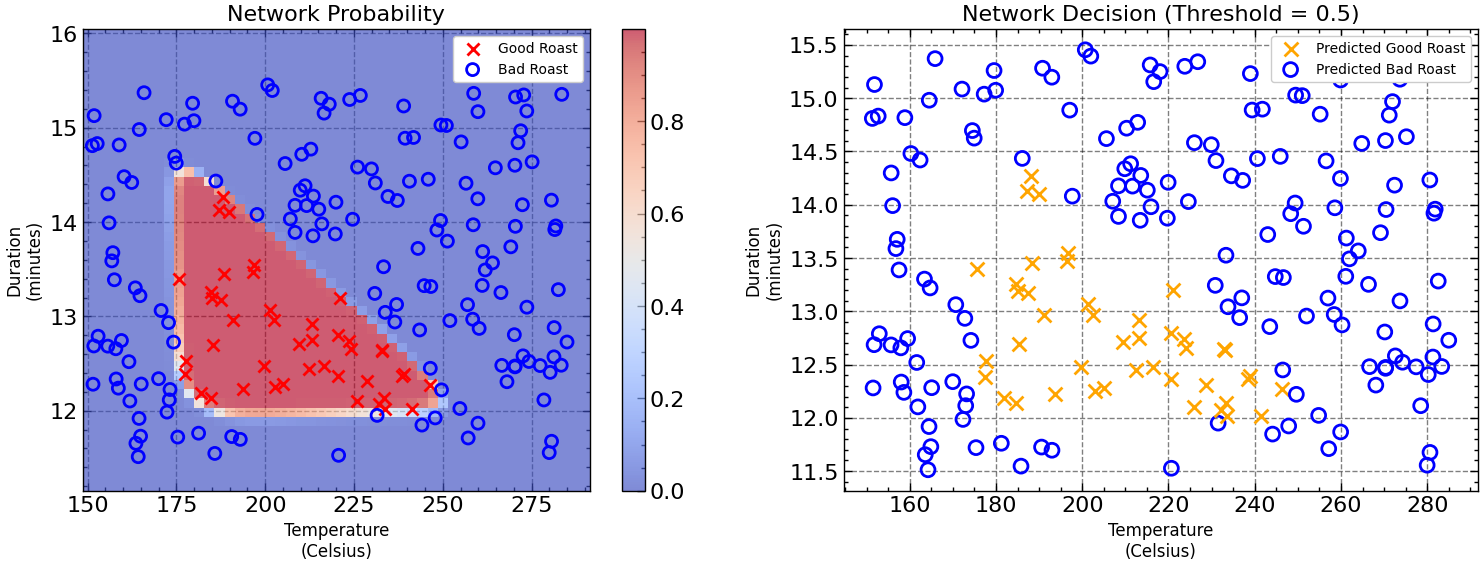

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
ax = axes[0]
ax.set_xlabel("Temperature\n(Celsius)", fontsize=12)
ax.set_ylabel("Duration\n(minutes)", fontsize=12)
c = ax.pcolormesh(temp, duration, y_grid, cmap="coolwarm", alpha=0.65)
fig.colorbar(c)
ax.scatter(X[pos][:, 0], X[pos][:, 1], marker="x", s=75, lw=2, facecolors="red", label="Good Roast")
ax.scatter(X[neg][:, 0], X[neg][:, 1], marker="o", s=75, lw=2, facecolors="none", edgecolors="blue", label="Bad Roast")
ax.set_title("Network Probability")
ax.legend(loc="upper right", fontsize=10)

ax = axes[1]
ax.set_xlabel("Temperature\n(Celsius)", fontsize=12)
ax.set_ylabel("Duration\n(minutes)", fontsize=12)
ax.set_title("Network Decision (Threshold = 0.5)")
toggle = 2
for current_data in X:
    if(model.predict(norm_l(current_data)) >= 0.5):
        ax.scatter(current_data[0], current_data[1], marker="x", facecolors="orange", s=100, lw=2, label="Predicted Good Roast")
        if toggle:
            ax.legend(fontsize=10, loc="upper right")
            toggle-=1
    else:
        ax.scatter(current_data[0], current_data[1], marker="o", facecolors="none", edgecolors="blue", s=100, lw=2, label="Predicted Bad Roast")
        if toggle:
            ax.legend(fontsize=10, loc="upper right")
            toggle-=1
fig.savefig("./NeuralResult", dpi=300)